<a href="https://colab.research.google.com/github/pwy7fv/DS-4002-Group-Projects/blob/main/OUTPUT/FF4_Vader_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#getting files from github repo
!git clone https://github.com/pwy7fv/DS-4002-Group-Projects

Cloning into 'DS-4002-Group-Projects'...
remote: Enumerating objects: 738, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 738 (delta 129), reused 78 (delta 49), pack-reused 525 (from 1)
Receiving objects: 100% (738/738), 11.92 MiB | 7.07 MiB/s, done.
Resolving deltas: 100% (408/408), done.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
#creating dataframe of FF4_clean_2009 data to analyze
df4_09 = pd.read_csv('/content/DS-4002-Group-Projects/DATA/Cleaned Data/FF4_clean2009.csv', low_memory=False)
df4_09.head()

,Rating,Title,Content,Author Name,Date,Year
0,7.0,"Still fast, still furious","Fast and Furious, or 4 Fast 4 Furious if you'r...",C-Younkin,2009-03-30,2009
1,4.0,First Five Minutes. Over,"Definitely, good for car-fans. Since I'm not o...",Mihnea_aka_Pitbull,2009-04-01,2009
2,4.0,In automatic transmission,Exhausted and pretty much running on synthetic...,Jay_Exiomo,2009-04-01,2009
3,10.0,"Great action, Nice cars and plenty of sexy bab...",I built this movie of 6 reels last night and s...,5klogiudice,2009-04-01,2009
4,8.0,Is this one the best one yet?,This was a good movie. They were able to bring...,blake-brown20,2009-04-02,2009


In [ ]:
#creating dataframe of FF4_clean_2009 data to analyze
df4_09 = pd.read_csv('/content/DS-4002-Group-Projects/DATA/Cleaned Data/FF4_clean2009.csv', low_memory=False)
df4_09.head()

,Rating,Title,Content,Author Name,Date,Year
0,7.0,"Still fast, still furious","Fast and Furious, or 4 Fast 4 Furious if you'r...",C-Younkin,2009-03-30,2009
1,4.0,First Five Minutes. Over,"Definitely, good for car-fans. Since I'm not o...",Mihnea_aka_Pitbull,2009-04-01,2009
2,4.0,In automatic transmission,Exhausted and pretty much running on synthetic...,Jay_Exiomo,2009-04-01,2009
3,10.0,"Great action, Nice cars and plenty of sexy bab...",I built this movie of 6 reels last night and s...,5klogiudice,2009-04-01,2009
4,8.0,Is this one the best one yet?,This was a good movie. They were able to bring...,blake-brown20,2009-04-02,2009


In [ ]:
#Got this code from cited reference [13] in listed references in README
def sentiment_scores(index, row):
    # Extract Content, Author Name, Date, Rating
    sentence = row["Content"]
    name = row["Author Name"]
    title = row['Title']
    review_date = row["Date"]
    review_year = row["Year"]
    rating = row["Rating"]

    # Create a SentimentIntensityAnalyzer object
    sid_obj = SentimentIntensityAnalyzer()

    # Get sentiment scores
    sentiment_dict = sid_obj.polarity_scores(sentence)

    # Determine overall sentiment
    if sentiment_dict['compound'] >= 0.05:
        sentiment_label = "Positive"
    elif sentiment_dict['compound'] <= -0.05:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    # Return sentiment results as a Series (so it's added as columns in the original DataFrame)
    return pd.Series({
        "Sentiment Overall": sentiment_label,
        "Negative Score": sentiment_dict['neg'],
        "Neutral Score": sentiment_dict['neu'],
        "Positive Score": sentiment_dict['pos'],
        "Overall Percentage Score": sentiment_dict['compound']
    })

In [ ]:
# Apply the function to the DataFrame and add new columns
df4_09[["Sentiment Overall", "Negative Score", "Neutral Score", "Positive Score", "Overall Percentage Score"]] = df4_09.apply(lambda row: sentiment_scores(row.name, row), axis=1)


In [ ]:
df4_09.head()

,Rating,Title,Content,Author Name,Date,Year,Sentiment Overall,Negative Score,Neutral Score,Positive Score,Overall Percentage Score
0,7.0,"Still fast, still furious","Fast and Furious, or 4 Fast 4 Furious if you'r...",C-Younkin,2009-03-30,2009,Positive,0.071,0.757,0.171,0.9968
1,4.0,First Five Minutes. Over,"Definitely, good for car-fans. Since I'm not o...",Mihnea_aka_Pitbull,2009-04-01,2009,Negative,0.141,0.811,0.048,-0.9504
2,4.0,In automatic transmission,Exhausted and pretty much running on synthetic...,Jay_Exiomo,2009-04-01,2009,Positive,0.086,0.796,0.119,0.8608
3,10.0,"Great action, Nice cars and plenty of sexy bab...",I built this movie of 6 reels last night and s...,5klogiudice,2009-04-01,2009,Positive,0.045,0.724,0.231,0.9852
4,8.0,Is this one the best one yet?,This was a good movie. They were able to bring...,blake-brown20,2009-04-02,2009,Positive,0.045,0.728,0.227,0.9961


In [ ]:
print(df4_09[['Rating', 'Sentiment Overall', 'Overall Percentage Score']])

    Rating Sentiment Overall  Overall Percentage Score
0      7.0          Positive                    0.9968
1      4.0          Negative                   -0.9504
2      4.0          Positive                    0.8608
3     10.0          Positive                    0.9852
4      8.0          Positive                    0.9961
..     ...               ...                       ...
61     7.0          Negative                   -0.9481
62     9.0          Positive                    0.9945
63     8.0          Positive                    0.9761
64     5.0          Positive                    0.9944
65    10.0          Negative                   -0.9487

[66 rows x 3 columns]


In [ ]:
df4_09.to_csv('/content/DS-4002-Group-Projects/DATA/Cleaned Data/FF4_Vader2009.csv', index = False) #make csv file and put it in repo

**Vader Analysis for FF4 (2019-2025)**

In [ ]:
#creating dataframe of FF4_clean_2009 data to analyze
df4_dec = pd.read_csv('/content/DS-4002-Group-Projects/DATA/Cleaned Data/FF4_clean_dec.csv', low_memory=False)
df4_dec.head()

,Rating,Title,Content,Author Name,Date,Year
0,3.0,The first one BORING!,"Even the atrocious Tokyo Drift wasn't boring, ...",educallejero,2019-03-24,2019
1,4.0,Best in the series so far,I found that the fourth part was more mature t...,lythis-love,2019-04-18,2019
2,7.0,Brilliant film.,It's say Brian is back working for the FBI and...,wesgunton,2019-04-22,2019
3,1.0,Annoying camera shake...,"Every time there is a fight scene, car chase o...",phil-932-237806,2019-05-10,2019
4,7.0,feels like we're back home,"Beastly movie. Awesome action, great racing sc...",FeastMode,2019-06-24,2019


In [ ]:
#Got this code from cited reference [13] in listed references in README
def sentiment_scores(index, row):
    # Extract Content, Author Name, Date, Rating
    sentence = row["Content"]
    name = row["Author Name"]
    title = row['Title']
    review_date = row["Date"]
    review_year = row["Year"]
    rating = row["Rating"]

    # Create a SentimentIntensityAnalyzer object
    sid_obj = SentimentIntensityAnalyzer()

    # Get sentiment scores
    sentiment_dict = sid_obj.polarity_scores(sentence)

    # Determine overall sentiment
    if sentiment_dict['compound'] >= 0.05:
        sentiment_label = "Positive"
    elif sentiment_dict['compound'] <= -0.05:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    # Return sentiment results as a Series (so it's added as columns in the original DataFrame)
    return pd.Series({
        "Sentiment Overall": sentiment_label,
        "Negative Score": sentiment_dict['neg'],
        "Neutral Score": sentiment_dict['neu'],
        "Positive Score": sentiment_dict['pos'],
        "Overall Percentage Score": sentiment_dict['compound']
    })

In [ ]:
# Apply the function to the DataFrame and add new columns
df4_dec[["Sentiment Overall", "Negative Score", "Neutral Score", "Positive Score", "Overall Percentage Score"]] = df4_dec.apply(lambda row: sentiment_scores(row.name, row), axis=1)


In [ ]:
df4_dec.head()

,Rating,Title,Content,Author Name,Date,Year,Sentiment Overall,Negative Score,Neutral Score,Positive Score,Overall Percentage Score
0,3.0,The first one BORING!,"Even the atrocious Tokyo Drift wasn't boring, ...",educallejero,2019-03-24,2019,Negative,0.191,0.725,0.084,-0.9825
1,4.0,Best in the series so far,I found that the fourth part was more mature t...,lythis-love,2019-04-18,2019,Positive,0.109,0.736,0.154,0.7779
2,7.0,Brilliant film.,It's say Brian is back working for the FBI and...,wesgunton,2019-04-22,2019,Negative,0.117,0.883,0.000,-0.7351
3,1.0,Annoying camera shake...,"Every time there is a fight scene, car chase o...",phil-932-237806,2019-05-10,2019,Negative,0.138,0.862,0.000,-0.6908
4,7.0,feels like we're back home,"Beastly movie. Awesome action, great racing sc...",FeastMode,2019-06-24,2019,Positive,0.037,0.674,0.289,0.9862


In [ ]:
df4_dec.to_csv('/content/DS-4002-Group-Projects/DATA/Cleaned Data/FF4_Vader_dec.csv', index = False) #make csv file and put it in repo

In [ ]:
import numpy as np
import scipy.stats as stats

# Extract the overall sentiment scores from both datasets
sentiment_09 = np.array(df4_09["Overall Percentage Score"])  # Ensure df3_2006 is loaded
sentiment_dec = np.array(df4_dec["Overall Percentage Score"])  # Ensure df3_2016 is loaded

# Print variance of both groups (checking assumption of equal variance)
var_09 = np.var(sentiment_09, ddof=1)  # Sample variance (ddof=1 for unbiased estimate)
var_dec = np.var(sentiment_dec, ddof=1)

print(f"Variance of 2009 Sentiment Scores: {var_09:.4f}")
print(f"Variance of 2019-2025 Sentiment Scores: {var_dec:.4f}")

# Perform the two-sample t-test (Welch’s t-test since variances might be unequal)
t_stat, p_value = stats.ttest_ind(sentiment_09, sentiment_dec, equal_var=False)

# Display results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sentiment between 2009 and 2019-2025.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sentiment.")

Variance of 2009 Sentiment Scores: 0.4504
Variance of 2019-2025 Sentiment Scores: 0.5511
T-statistic: 2.4002
P-value: 0.0176
Reject the null hypothesis: There is a significant difference in sentiment between 2009 and 2019-2025.


In [ ]:
# Group by the 'Year' column and calculate the mean of 'Overall Percentage Score'
avg_sentiment_09 = df4_09['Overall Percentage Score'].mean()
avg_sentiment_dec = df4_dec['Overall Percentage Score'].mean()

print(f"Average sentiment score for 2009: {avg_sentiment_09}")
print(f"Average sentiment score for 2019 - 2025: {avg_sentiment_dec}")


Average sentiment score for 2009: 0.5827878787878786
Average sentiment score for 2019 - 2025: 0.3236228070175439


**Correlation b/w Rating and "Overall Percentage Score"**

In [10]:
df4_vader09 = pd.read_csv('/content/DS-4002-Group-Projects/DATA/Cleaned Data/Vader Included Datasets/FF4_Vader2009.csv', low_memory=False)
df4_vader09.head()

,Rating,Title,Content,Author Name,Date,Year,Negative Score,Neutral Score,Positive Score,Overall Percentage Score,Overall Sentiment
0,7.0,"Still fast, still furious","Fast and Furious, or 4 Fast 4 Furious if you'r...",C-Younkin,2009-03-30,2009,0.061,0.770,0.170,0.9974,Positive
1,4.0,First Five Minutes. Over,"Definitely, good for car-fans. Since I'm not o...",Mihnea_aka_Pitbull,2009-04-01,2009,0.137,0.817,0.046,-0.9504,Negative
2,4.0,In automatic transmission,Exhausted and pretty much running on synthetic...,Jay_Exiomo,2009-04-01,2009,0.097,0.791,0.112,0.5426,Positive
3,10.0,"Great action, Nice cars and plenty of sexy bab...",I built this movie of 6 reels last night and s...,5klogiudice,2009-04-01,2009,0.042,0.706,0.253,0.9901,Positive
4,8.0,Is this one the best one yet?,This was a good movie. They were able to bring...,blake-brown20,2009-04-02,2009,0.050,0.744,0.206,0.9950,Positive


Correlation coefficient: 0.36, p-value: 0.00320


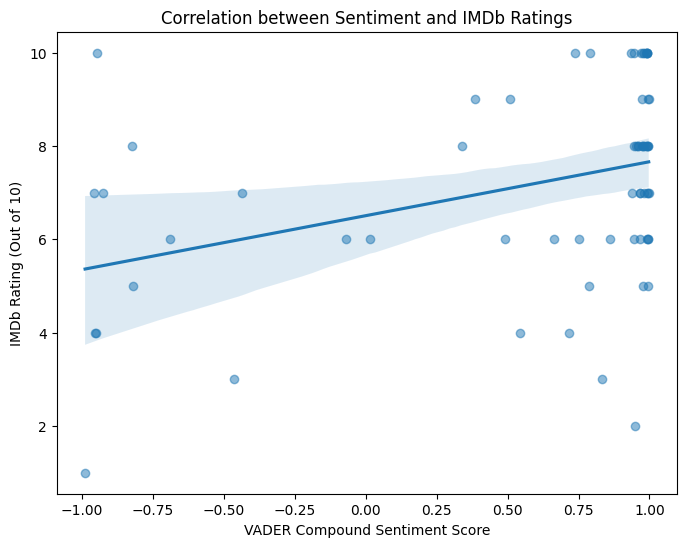

In [14]:
import scipy.stats as stats

# Compute correlation
correlation, p_value = stats.pearsonr(df4_vader09["Overall Percentage Score"], df4_vader09["Rating"])
print(f"Correlation coefficient: {correlation:.2f}, p-value: {p_value:.5f}")

# Scatter plot
plt.figure(figsize=(8,6))
sns.regplot(x=df4_vader09["Overall Percentage Score"], y=df4_vader09["Rating"], scatter_kws={'alpha':0.5})
plt.xlabel("VADER Compound Sentiment Score")
plt.ylabel("IMDb Rating (Out of 10)")
plt.title("Correlation between Sentiment and IMDb Ratings")
plt.show()

In [11]:
df4_vader_dec = pd.read_csv('/content/DS-4002-Group-Projects/DATA/Cleaned Data/Vader Included Datasets/FF4_Vader_dec.csv', low_memory=False)
df4_vader_dec.head()

,Rating,Title,Content,Author Name,Date,Year,Negative Score,Neutral Score,Positive Score,Overall Percentage Score,Overall Sentiment
0,3.0,The first one BORING!,"Even the atrocious Tokyo Drift wasn't boring, ...",educallejero,2019-03-24,2019,0.191,0.725,0.084,-0.9825,Negative
1,4.0,Best in the series so far,I found that the fourth part was more mature t...,lythis-love,2019-04-18,2019,0.109,0.736,0.154,0.7779,Positive
2,7.0,Brilliant film.,It's say Brian is back working for the FBI and...,wesgunton,2019-04-22,2019,0.117,0.883,0.000,-0.7351,Negative
3,1.0,Annoying camera shake...,"Every time there is a fight scene, car chase o...",phil-932-237806,2019-05-10,2019,0.138,0.862,0.000,-0.6908,Negative
4,7.0,feels like we're back home,"Beastly movie. Awesome action, great racing sc...",FeastMode,2019-06-24,2019,0.037,0.674,0.289,0.9862,Positive


Correlation coefficient: 0.41, p-value: 0.00000


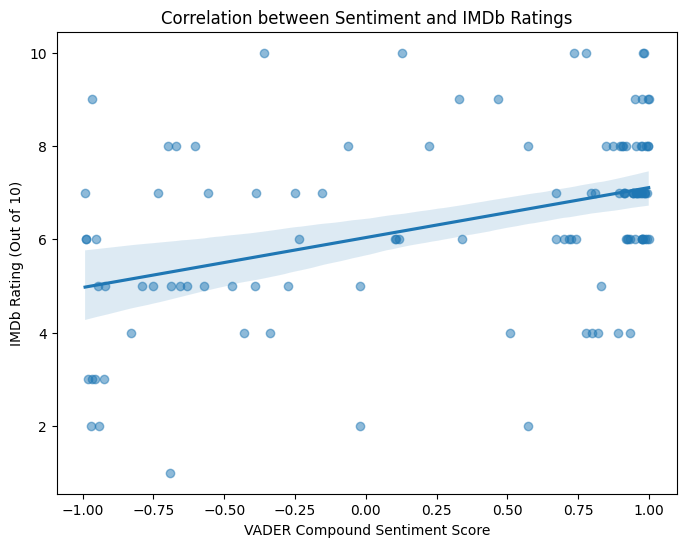

In [17]:
import scipy.stats as stats

# Compute correlation
correlation, p_value = stats.pearsonr(df4_vader_dec["Overall Percentage Score"], df4_vader_dec["Rating"])
print(f"Correlation coefficient: {correlation:.2f}, p-value: {p_value:.5f}")

# Scatter plot
plt.figure(figsize=(8,6))
sns.regplot(x=df4_vader_dec["Overall Percentage Score"], y=df4_vader_dec["Rating"], scatter_kws={'alpha':0.5})
plt.xlabel("VADER Compound Sentiment Score")
plt.ylabel("IMDb Rating (Out of 10)")
plt.title("Correlation between Sentiment and IMDb Ratings")
plt.show()